Thank you for choosing Bgolearn for material design. 
Bgolearn is developed to facilitate the application of machine learning in research.
Bgolearn is designed for optimizing single-target material properties.
The BgoKit package is being developed to facilitate multi-task design.


If you need to perform multi-target optimization, here are two important reminders:

1. Multi-tasks can be converted into a single task using domain knowledge. 
For example, you can use a weighted linear combination in the simplest situation. That is, y = w*y1 + y2...

2. Multi-tasks can be optimized using Pareto fronts. 
Bgolearn will return two arrays based on your dataset: 
the first array is a evaluation score for each virtual sample, 
while the second array is the recommended data considering only the current optimized target.

The first array is crucial for multi-task optimization. 
For instance, in a two-task optimization scenario, you can evaluate each candidate twice for the two separate targets. 
Then, plot the score of target 1 for each sample on the x-axis and the score of target 2 on the y-axis. 
The trade-off consideration is to select the data located in the front of the banana curve.

I am delighted to invite you to participate in the development of Bgolearn. 
If you have any issues or suggestions, please feel free to contact me at binjacobcao@gmail.com.

####################################################################################################################

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import Bgolearn.BGOsampling as BGOS

# It's a noise-free example/one-d

## 1 : input the dataset 

In [2]:
data = pd.read_csv('data.csv')
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [3]:
data

x         y
0    0.5  6.322063
1    1.0  5.273000
2    1.5  4.694562
3    2.0  4.448000
4    2.5  4.414062
5    3.0  4.493000
6    3.5  4.604563
7    4.0  4.688000
8    4.5  4.702063
9    9.0  4.553000
10   9.5  5.894563
11  10.0  8.000000

In [4]:
x

x
0    0.5
1    1.0
2    1.5
3    2.0
4    2.5
5    3.0
6    3.5
7    4.0
8    4.5
9    9.0
10   9.5
11  10.0

In [5]:
y

0     6.322063
1     5.273000
2     4.694562
3     4.448000
4     4.414062
5     4.493000
6     4.604563
7     4.688000
8     4.702063
9     4.553000
10    5.894563
11    8.000000
Name: y, dtype: float64

## 2 : design virtual space

The virtual samples have been designed by you. 
They have not been tested or generated from actual data sources. 
These samples consist only of features and do not include any labels.
While the number of virtual samples can be arbitrary, they have been reasonably designed to ensure meaningful.

In [6]:
# searching domain is [0,11]
# one-d
vs = np.linspace(0,11,111)
vs

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. ])

In [7]:
len(vs)

111

## note : the true function and initial data distribution

The real function is unnecessary for optimization.
In this simple case. 
we plot the real function is to demonstrate the rationality of Bgolearn's recommended points. 

In [8]:
# true/real function 
def function(X):
    X = np.array(X)
    Y = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8
    return Y

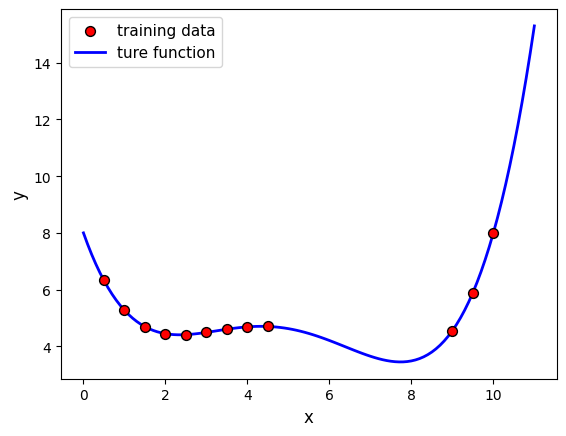

In [9]:

plt.figure()
ax1 = plt.subplot()
ax1.scatter(x,y,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
ax1.plot(vs,function(vs),'b',lw=2,label="ture function")
plt.xlabel('x',fontsize = 12)
plt.ylabel('y',fontsize = 12)
plt.legend(fontsize = 11)

## 3 : give the next recommendation by Bgolearn

In [10]:
Bgolearn = BGOS.Bgolearn()

Mymodel = Bgolearn.fit(data_matrix = x,Measured_response = y ,virtual_samples = vs,opt_num=4)

# Expected Improvement method
score, data = Mymodel.EI()

 ____                 _                           
| __ )   __ _   ___  | |  ___   __ _  _ __  _ __  
|  _ \  / _` | / _ \ | | / _ \ / _` || '__|| '_ \ 
| |_) || (_| || (_) || ||  __/| (_| || |   | | | |
|____/  \__, | \___/ |_| \___| \__,_||_|   |_| |_|
        |___/                                     

Package Name : Bgolearn
Author : Bin CAO, HKUST(GZ)
Intro : https://bgolearn.netlify.app/
URL : https://github.com/Bin-Cao/Bgolearn
Citation Format Suggestion:
[Bin CAO et al]. "Active learning accelerates the discovery of high strength and high ductility lead-free solder alloys", [2023], [DOI : http://dx.doi.org/10.2139/ssrn.4686075].
Executed on : 2024-01-06 23:55:38  | Have a great day.
The internal model is instantiated with optimized homogenous noise
current optimal is : 4.4140625
The 1-th datum recomended by Expected Improvement : 
 x =  [8.2]
The predictions of Bgolearn are : 
 y =  4.338227476898954
The 2-th datum recomended by Expected Improvement : 
 x =  [8.3]
The predictio

In [11]:
# score : the  assessment scores of Bgolearn by EI mothod for all the candidates, higher the better
score

array([2.47600126e-03, 9.67368543e-04, 3.22942353e-04, 9.54907232e-05,
       2.79853375e-05, 1.01042986e-05, 5.96877718e-06, 7.05748819e-06,
       1.61519050e-05, 5.59715732e-05, 2.20648104e-04, 8.12089220e-04,
       2.54400457e-03, 6.62194834e-03, 1.44400665e-02, 2.69037192e-02,
       4.37810787e-02, 6.35582014e-02, 8.39060581e-02, 1.02435578e-01,
       1.17317668e-01, 1.27560719e-01, 1.32981621e-01, 1.34007520e-01,
       1.31430491e-01, 1.26187112e-01, 1.19194345e-01, 1.11248773e-01,
       1.02982517e-01, 9.48611532e-02, 8.72054151e-02, 8.02195602e-02,
       7.40142206e-02, 6.86188517e-02, 6.39862925e-02, 5.99974360e-02,
       5.64761324e-02, 5.32228289e-02, 5.00705989e-02, 4.69596645e-02,
       4.40161813e-02, 4.16085857e-02, 4.03461512e-02, 4.09933252e-02,
       4.43060426e-02, 5.08306957e-02, 6.07281376e-02, 7.36997816e-02,
       8.90563003e-02, 1.05881189e-01, 1.23203132e-01, 1.40125888e-01,
       1.55907652e-01, 1.70000147e-01, 1.82059091e-01, 1.91934531e-01,
      

In [13]:
# datum : the datum Bgolearn recommended which is most likely to be the minimun
data

array([[8.2]])

## 4 : verify the recommended datum and add the result into the dataset

In [13]:
# simulate an experiment
new_y = function(8.2)
new_y

3.5702288000000166

At the end of one cycle, in the next cycle:
1. The training set samples are augmented, allowing the model to achieve a more precise fit to the x-y functional relationship, resulting in improved recommendations.
2. The sample augmentation ensures accurate sampling at the original sparse positions, expanding the coverage space of the initial dataset.

## 5 : more details in Bgolearn package

## if you want to apply your own regression model

Sometimes, users may find it necessary **to define their custom model** 
or modify the existing model to pursue improved results and enhanced flexibility. 
**Bgolearn allows and supports** such customization to meet the diverse needs and preferences of users.

Your model can be passed to Bgolearn via the parameter **Kriging_model** defined in fit()
However, your function should be defined **by the template I provided below**

1: it is a class has an attribute of **fit_pre**
2: **fit_pre** has three parameters, i.e., xtrain, ytrain, xtest
    xtrain (features) & ytrain (labels or responses) are the training data for your model;
    xtest (features) is the predicted data 
3: this class has two output, i.e., mean, std
    mean : the predictions of xtest
    std : the prediction standard deviations (Confidence) of xtest

In [14]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import  RBF

class My_Regressor(object): 
    def fit_pre(self,xtrain,ytrain,xtest):
        # instantiated model
        mdoel = GaussianProcessRegressor(kernel=RBF()).fit(xtrain,ytrain)
        # defined the outputs
        mean,std = mdoel.predict(xtest,return_std=True)
        return mean,std    

In [15]:
Bgolearn = BGOS.Bgolearn()

Mymodel = Bgolearn.fit(
    data_matrix = x,Measured_response = y , virtual_samples = vs,
    Kriging_model = My_Regressor
    
)

# Expected Improvement method
score, data = Mymodel.EI()

The external model is instantiated
current optimal is : 4.4140625
The next datum recomended by Expected Improvement : 
 x =  [8.5]


The results obtained here may differ somewhat from using the Bgolearn built-in model

since a user-defined Gaussian process with default parameters is utilized in My_Regressor. 

Although the Bgolearn built-in model is also a Gaussian process model, I have implemented a well-designed parameter estimation method and data processing approach to enhance its performance and achieve more meaningful outcomes.

### Bgolearn can recommend n candidates at  once 

In [17]:
Bgolearn = BGOS.Bgolearn()

# for n = 3
Mymodel = Bgolearn.fit(
    data_matrix = x,Measured_response = y , virtual_samples = vs,
    opt_num = 3
    
)


score, data = Mymodel.PoI()

The internal model is instantiated with optimized homogenous noise
current optimal is : 4.4140625
The 1-th datum recomended by Probability of Improvement  : 
 x =  [8.6]
The 2-th datum recomended by Probability of Improvement  : 
 x =  [8.4]
The 3-th datum recomended by Probability of Improvement  : 
 x =  [8.5]


##  Bgolearn can search the maximum of y (set : min_search = False)

In [18]:
Bgolearn = BGOS.Bgolearn()

Mymodel = Bgolearn.fit(
    data_matrix = x,Measured_response = y , virtual_samples = vs,
    min_search = False
    
)

# Expected Improvement method
score, data = Mymodel.EI()

The internal model is instantiated with optimized homogenous noise
current optimal is : 8.0
The next datum recomended by Expected Improvement : 
 x =  [10.6]


## Bgolearn can test the fitting goodness of model on training dataset (CV_test = 'LOOCV', or =5)

In [19]:
Bgolearn = BGOS.Bgolearn()

# by leave one out cross validation 
Mymodel = Bgolearn.fit(
    data_matrix = x,Measured_response = y , virtual_samples = vs,
    CV_test = 'LOOCV'
    
)

# Expected Improvement method
score, data = Mymodel.EI()

The internal model is instantiated with optimized homogenous noise
Time consuming warning
LeaveOneOut Cross validation is applied
Fitting goodness on training dataset: 
  RMSE = 0.242285   MAE = 0.152272   R2 = 0.944968
Fitting goodness of LOOCV:
  RMSE = 1.029498   MAE = 0.640032   R2 = 0.006403
current optimal is : 4.4140625
The next datum recomended by Expected Improvement : 
 x =  [8.2]


## by 5-fold CV

In [21]:
Bgolearn = BGOS.Bgolearn()

# by n-folds cross validation
# if n = 5
Mymodel = Bgolearn.fit(
    data_matrix = x,Measured_response = y , virtual_samples = vs,
    CV_test = 5
    
)

# Expected Improvement method
score, data = Mymodel.EI()

The internal model is instantiated with optimized homogenous noise
Time consuming warning
5-folds Cross validation is applied
Fitting goodness on training dataset: 
  RMSE = 0.242285   MAE = 0.152272   R2 = 0.944968
Fitting goodness of 5-CVs:
  RMSE = 0.998537   MAE = 0.631270   R2 = 0.065268
current optimal is : 4.4140625
The next datum recomended by Expected Improvement : 
 x =  [8.2]


## Bgolearn provided many acquisition function, e.g., Knowledge Gradient

In [13]:
Bgolearn = BGOS.Bgolearn()

Mymodel = Bgolearn.fit(
    data_matrix = x,Measured_response = y ,virtual_samples = vs,

)

# Knowledge Gradient method
score, data = Mymodel.Knowledge_G(MC_num=4,Proc_num=4)

 ____                 _                           
| __ )   __ _   ___  | |  ___   __ _  _ __  _ __  
|  _ \  / _` | / _ \ | | / _ \ / _` || '__|| '_ \ 
| |_) || (_| || (_) || ||  __/| (_| || |   | | | |
|____/  \__, | \___/ |_| \___| \__,_||_|   |_| |_|
        |___/                                     

Package Name : Bgolearn
Author : Bin CAO, HKUST(GZ)
Intro : https://bgolearn.netlify.app/
URL : https://github.com/Bin-Cao/Bgolearn
Citation Format Suggestion:
[Bin CAO et al]. "Active learning accelerates the discovery of high strength and high ductility lead-free solder alloys" [Journal], [2023], [DOI : xx].
Executed on : 2023-12-28 16:07:47  | Have a great day.
The internal model is instantiated with optimized homogenous noise
Execution using multiple processes, processes num = 4,
The next datum recomended by Knowledge Gradient : 
 x =  [6.1]
The predictions of Bgolearn are : 
 y =  5.107177118584491


more details, see https://bgolearn.netlify.app/